In [4]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1KJh4xxmgOJwZxA0qoGKKbSZo3nkLYHRe


In [5]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'file2.txt'})
uploaded.SetContentString('Hello World!!')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1yqXDmMh72HKXrPdmhZmxrantnDeBoXkk


In [14]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title melb_data.csv, id 1r2zeqosg_uW4XM7dSUiVAPi8K9MLSeP9


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1r2zeqosg_uW4XM7dSUiVAPi8K9MLSeP9' # https://drive.google.com/open?id=1r2zeqosg_uW4XM7dSUiVAPi8K9MLSeP9
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('melb_data_local.csv')


In [9]:
!ls

adc.json  melb_data_local.csv  sample_data


#Pandas

In [0]:
import pandas as pd


In [0]:
df = pd.read_csv('melb_data_local.csv')

In [13]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [15]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [16]:
type(df)

pandas.core.frame.DataFrame

In [0]:
dir(df) #All of the functions available in df  

In [18]:
len(df)

13580

In [19]:
df.shape

(13580, 21)

In [20]:
df.loc[5]

Suburb                      Abbotsford
Address                 129 Charles St
Rooms                                2
Type                                 h
Price                           941000
Method                               S
SellerG                         Jellis
Date                         7/05/2016
Distance                           2.5
Postcode                          3067
Bedroom2                             2
Bathroom                             1
Car                                  0
Landsize                           181
BuildingArea                       NaN
YearBuilt                          NaN
CouncilArea                      Yarra
Lattitude                     -37.8041
Longtitude                     144.995
Regionname       Northern Metropolitan
Propertycount                     4019
Name: 5, dtype: object

In [0]:
df_short=df[0:10]

In [22]:
df_short.shape

(10, 21)

In [0]:
df_thin=df[['Price','Method','Rooms','Car']]

In [35]:
df_thin.shape

(13580, 3)

In [0]:
df_cheap = df_thin[df_thin['Price']<=1000000]

In [29]:
df_cheap.shape

(7837, 2)

In [32]:
df_thin['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [33]:
df_thin.describe()

,Price
count,1.358000e+04
mean,1.075684e+06
std,6.393107e+05
min,8.500000e+04
25%,6.500000e+05
50%,9.030000e+05
75%,1.330000e+06
max,9.000000e+06


In [36]:
df_thin[df_thin['Rooms']==4]['Price'].mean()

1445281.7358630951

In [37]:
df_thin[df_thin['Rooms']==3]['Price'].mean()

1076080.6248937256

In [38]:
df_thin[df_thin['Rooms']==2]['Price'].mean()

775081.1894188597

In [39]:
df_thin[df_thin['Rooms']==1]['Price'].mean()

433824.45080763585

In [41]:
df_thin[df_thin['Rooms']==5]['Price'].mean()

1870260.4161073826

In [0]:
#df_thin['Rooms'].values.unique()

In [0]:
g=df.groupby(['Rooms'])

In [47]:
for key,df_key in g:
  print(key)
  print(df_key)

1
                Suburb  ... Propertycount
8           Abbotsford  ...        4019.0
14          Abbotsford  ...        4019.0
26          Abbotsford  ...        4019.0
28          Abbotsford  ...        4019.0
33          Abbotsford  ...        4019.0
107        Albert Park  ...        3280.0
119        Albert Park  ...        3280.0
226           Armadale  ...        4836.0
240           Armadale  ...        4836.0
241           Armadale  ...        4836.0
242           Armadale  ...        4836.0
247           Armadale  ...        4836.0
250           Armadale  ...        4836.0
256           Armadale  ...        4836.0
264           Armadale  ...        4836.0
265           Armadale  ...        4836.0
280           Armadale  ...        4836.0
314         Ascot Vale  ...        6567.0
491          Balaclava  ...        2952.0
504          Balaclava  ...        2952.0
533             Balwyn  ...        5682.0
791     Bentleigh East  ...       10969.0
824     Bentleigh East  ...     

In [48]:
g.mean()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,,,,,,,,,,,,
1,4.338245e+05,5.939207,3107.058737,1.029369,1.007342,0.883481,384.681351,52.618506,1976.175281,-37.822123,144.984649,8699.651982
2,7.750812e+05,7.727659,3101.450110,2.016996,1.137336,1.129210,421.164748,92.872142,1967.101969,-37.813112,144.989711,7802.574836
3,1.076081e+06,11.003690,3099.933175,2.984696,1.473219,1.697881,597.700731,139.147184,1962.539269,-37.802929,144.987706,7311.337018
4,1.445282e+06,12.149665,3118.688616,3.921503,2.039062,2.062221,639.727679,208.965073,1962.921362,-37.813326,145.012175,7093.617560
5,1.870260e+06,11.778523,3117.986577,4.875839,2.686242,2.310403,798.505034,405.607347,1963.904145,-37.814517,145.033244,7051.510067
6,1.849366e+06,12.685075,3121.402985,5.820896,2.820896,2.582090,841.462687,278.513889,1955.513514,-37.808151,145.034099,6668.865672
7,1.920700e+06,9.560000,3095.700000,6.600000,2.900000,2.600000,1089.700000,340.423333,1980.428571,-37.792333,145.033313,6874.300000
8,1.602750e+06,10.912500,3095.875000,7.125000,4.125000,3.375000,843.875000,256.000000,1967.250000,-37.799385,145.014315,6085.375000
10,9.000000e+05,12.100000,3083.000000,10.000000,3.000000,2.000000,313.000000,NaN,2006.000000,-37.710980,145.053810,10175.000000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


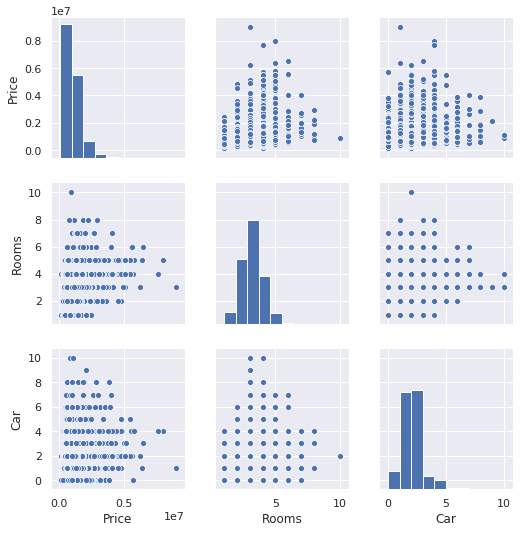

In [52]:
ax=sns.pairplot(df_thin,diag_kind='hist')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


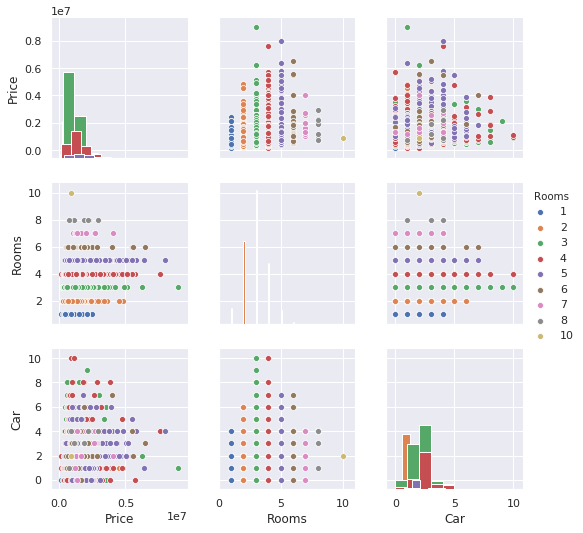

In [53]:
ax=sns.pairplot(df_thin,diag_kind='hist',hue='Rooms')

#Debugging

In [0]:
import random


In [0]:
def fact(x):
  if x == 0:
    return 1
  return x*fact(x-1)

In [55]:
fact(4)

24

In [0]:
def code_to_debug():
  #import pdb; pdb.set_trace()
  for i in range(10):
    x=random.random()
    fact(x)
    

In [68]:
%xmode Verbose

Exception reporting mode: Verbose


In [74]:
code_to_debug()

> <ipython-input-72-2aefcd981af4>(4)code_to_debug()
-> x=random.random()
(Pdb) help step
s(tep)
        Execute the current line, stop at the first possible occasion
        (either in a function that is called or in the current
        function).
(Pdb) c
x is not an integer


In [0]:
def fact_debugged(x):
  if not isinstance(x,int):
    print("x is not an integer")
    return -1
  if x == 0:
    return 1
  return x*fact(x-1)

In [0]:
def code_to_debug():
  import pdb; pdb.set_trace()
  #for i in range(10):
  x=random.random()
  fact_debugged(x)